## Exploratory data analysis (EDA) of sea ice extent in Northern hemisphere

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "../Images/arctic_sea_ice.png", width = 400)

This notebook provides the data analysis of sea ice extent in the northern hemisphere from 1978 till 2022.

The content of this notebook is as follows

1. Importing the libraries
2. Reading the data
3. Cleaning the data
4. EDA
5. Summary

## Importing the libraries

In [31]:
import pandas as pd
import numpy as np
from ftplib import FTP
import os
import warnings
from datetime import datetime

# # Data Viz. 
# import statsmodels.formula.api as smf
# from statsmodels.tsa.seasonal import seasonal_decompose
# from scipy.ndimage import gaussian_filter
# from calendar import monthrange
# from calendar import month_name

# Plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#1E4485', '#99D04A','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)

%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

plt.rcParams.update({'figure.facecolor':'white'})

## Reading the data

In [4]:
df = pd.read_csv('data/N_seaice_extent_daily_v3.0.csv')
df.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [5]:
df.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

The dataset contains 6 columns and the column names are changed as shown below.

In [6]:
df = df.rename(columns={'Year': 'Year', ' Month': 'Month', ' Day': 'Day', '     Extent': 'Extent', '    Missing': 'Missing', ' Source Data': 'Source Data' })

In [7]:
df.columns

Index(['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data'], dtype='object')

**Dropping the column Source as it does not give any important information for the further analysis.**

In [8]:
df.drop('Source Data', axis = 1, inplace = True)


In [9]:
df.head()

,Year,Month,Day,Extent,Missing
0,YYYY,MM,DD,10^6 sq km,10^6 sq km
1,1978,10,26,10.231,0.000
2,1978,10,28,10.420,0.000
3,1978,10,30,10.557,0.000
4,1978,11,01,10.670,0.000


In [10]:
df.tail()

,Year,Month,Day,Extent,Missing
14179,2022,02,28,14.671,0.000
14180,2022,03,01,14.693,0.000
14181,2022,03,02,14.765,0.000
14182,2022,03,03,14.703,0.000
14183,2022,03,04,14.748,0.000


In [11]:
df.shape

(14184, 5)

**The dataset has 14184 rows and 6 columns.**

**Checking for the information about the data**

In [12]:
# Checking for the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14184 entries, 0 to 14183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     14184 non-null  object
 1   Month    14184 non-null  object
 2   Day      14184 non-null  object
 3   Extent   14184 non-null  object
 4   Missing  14184 non-null  object
dtypes: object(5)
memory usage: 554.2+ KB


In [13]:
df.nunique()

Year         46
Month        13
Day          32
Extent     7977
Missing       3
dtype: int64

**Checking for the statistical distribution of the data**

In [14]:
df.describe()

,Year,Month,Day,Extent,Missing
count,14184,14184,14184,14184,14184
unique,46,13,32,7977,3
top,2000,10,25,14.404,0.000
freq,366,1212,468,10,14182


In [15]:
df.isnull().sum()

Year       0
Month      0
Day        0
Extent     0
Missing    0
dtype: int64

## Cleaning the data

**As the first row of the dataset is only the information about the columns, dropping it for further analysis**  

In [16]:
# dropping first row
df = df.iloc[1: , :]

In [17]:
df.head()

,Year,Month,Day,Extent,Missing
1,1978,10,26,10.231,0.000
2,1978,10,28,10.420,0.000
3,1978,10,30,10.557,0.000
4,1978,11,01,10.670,0.000
5,1978,11,03,10.777,0.000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14183 entries, 1 to 14183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     14183 non-null  object
 1   Month    14183 non-null  object
 2   Day      14183 non-null  object
 3   Extent   14183 non-null  object
 4   Missing  14183 non-null  object
dtypes: object(5)
memory usage: 554.2+ KB


From the above information, it is shown that all the variables are obeject type. 

### Changing the type of 'Extent' from object to float

In [19]:
df['Extent'] = df['Extent'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14183 entries, 1 to 14183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     14183 non-null  object 
 1   Month    14183 non-null  object 
 2   Day      14183 non-null  object 
 3   Extent   14183 non-null  float64
 4   Missing  14183 non-null  object 
dtypes: float64(1), object(4)
memory usage: 554.2+ KB


### Creating a new column with date

In [21]:
df['date']=pd.to_datetime(df[['Year','Month','Day']])

### Adding Missing values

In [22]:
df2 = df[['date', 'Extent']]
# in the first timeperiod we only have values for every second day
# first create a DataFrame with all dates between specified start<-->end using pd.date_range()
all_dates = pd.DataFrame(pd.date_range(df2['date'].min(), df2['date'].max()), columns=['date'])
# from the all_dates DataFrame, left join onto the DataFrame with missing dates
df_n = all_dates.merge(right=df2, how='left', on='date')
# filling the NaN values with the values of the day before
df_n.fillna(method='ffill', inplace=True)
df_n = df_n.reset_index(drop=True)
df_n.tail()

,date,Extent
15831,2022-02-28,14.671
15832,2022-03-01,14.693
15833,2022-03-02,14.765
15834,2022-03-03,14.703
15835,2022-03-04,14.748


In [23]:
df2.to_csv('data/NH_modelling.csv', encoding='utf-8', index=False)

In [24]:
df2.dtypes

date      datetime64[ns]
Extent           float64
dtype: object

### Converting date, day, month and year to timestamp format 

In [38]:
df_n['date'] = pd.to_datetime(df_n['date'], format='%Y-%m-%d')
# Convert timestamp to datetime object
df_n = df_n.assign(
    timestamp = lambda x: pd.to_datetime(x['date']), 
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    dayofyear = lambda x: x['date'].dt.dayofyear
)

In [26]:
df_n.dtypes

date         datetime64[ns]
Extent              float64
timestamp    datetime64[ns]
year                  int64
month                 int64
day                   int64
dtype: object

In [39]:
df_n

,date,Extent,timestamp,year,month,day,dayofyear
0,1978-10-26,10.231,1978-10-26,1978,10,26,299
1,1978-10-27,10.231,1978-10-27,1978,10,27,300
2,1978-10-28,10.420,1978-10-28,1978,10,28,301
3,1978-10-29,10.420,1978-10-29,1978,10,29,302
4,1978-10-30,10.557,1978-10-30,1978,10,30,303
...,...,...,...,...,...,...,...
15831,2022-02-28,14.671,2022-02-28,2022,2,28,59
15832,2022-03-01,14.693,2022-03-01,2022,3,1,60
15833,2022-03-02,14.765,2022-03-02,2022,3,2,61
15834,2022-03-03,14.703,2022-03-03,2022,3,3,62


In [28]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15836 entries, 0 to 15835
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       15836 non-null  datetime64[ns]
 1   Extent     15836 non-null  float64       
 2   timestamp  15836 non-null  datetime64[ns]
 3   year       15836 non-null  int64         
 4   month      15836 non-null  int64         
 5   day        15836 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 742.4 KB


## Exploratory Data Analysis

### Daily Extent of Sea ice in northern hemisphere

In [30]:
import seaborn as sns

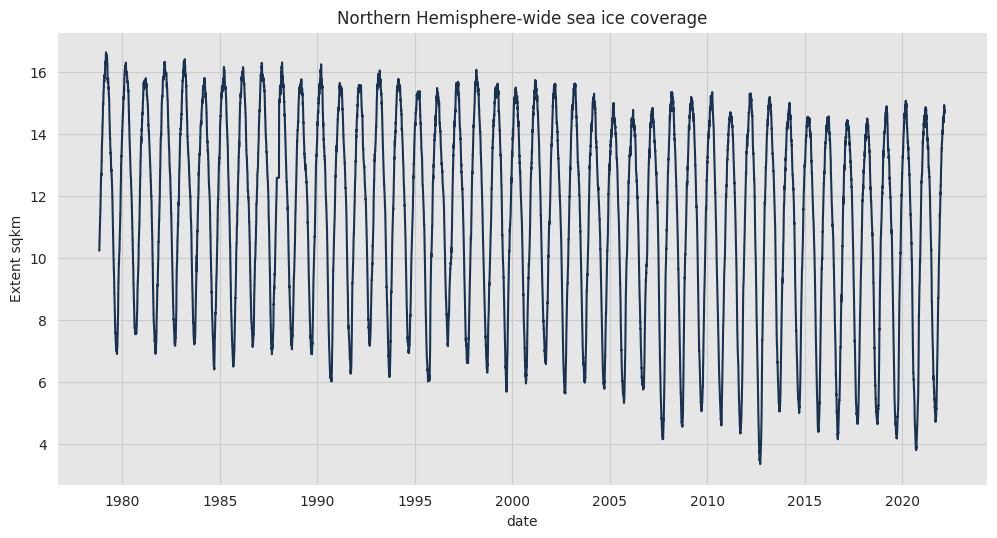

In [32]:
fig, ax = plt.subplots()
sns.lineplot(x=df_n['date'], y=df_n['Extent'] , data=df_n, ax=ax)
ax.set(title='Northern Hemisphere-wide sea ice coverage', ylabel=r'Extent sqkm');

### Distribution of Sea ice in Northern hemisphere 

In the density plot below, it is visualizing the probability distribution of the sea ice. Density curves are usually scaled such that the area under the curve equals one. From the distribution graph it is shown the that extent of sea ice is from the range of 3.8 sq km to approaximately 16 sq km.

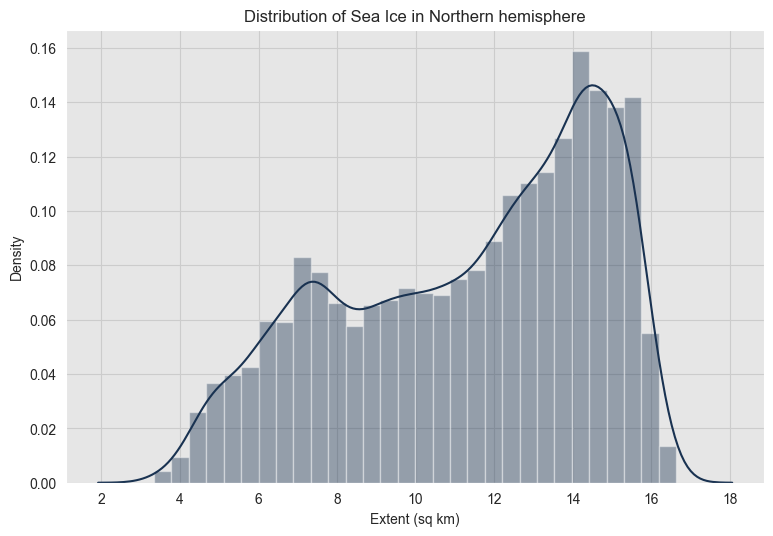

In [30]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.distplot(df_n.Extent)
ax.set(title='Distribution of Sea Ice in Northern hemisphere')
ax.set(xlabel='Extent (sq km)');

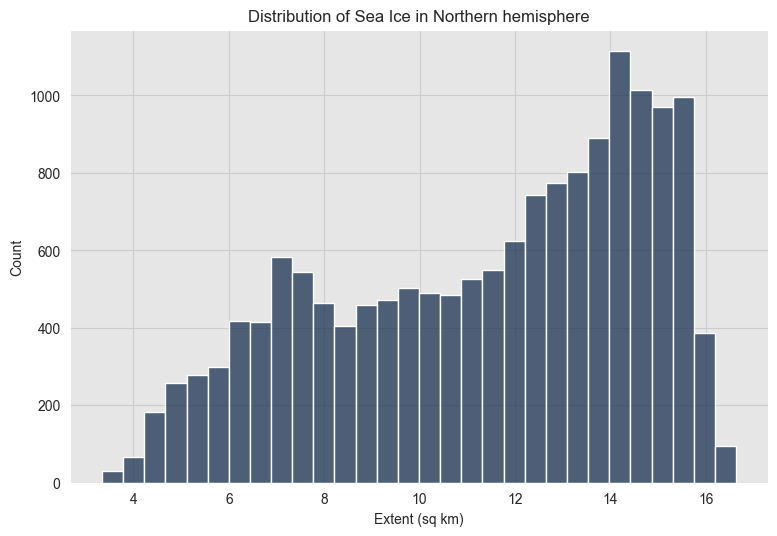

In [31]:


fig, ax = plt.subplots(figsize=(9, 6))
sns.histplot(x='Extent', data=df_n, ax=ax)
ax.set(title='Distribution of Sea Ice in Northern hemisphere', xlabel='Extent (sq km)');

**From the distribution graph it is shown the that extent of sea ice is from the range of 3.8 sq km to approaximately 16 sq km.** 

### Line plot of Extent with respect to year

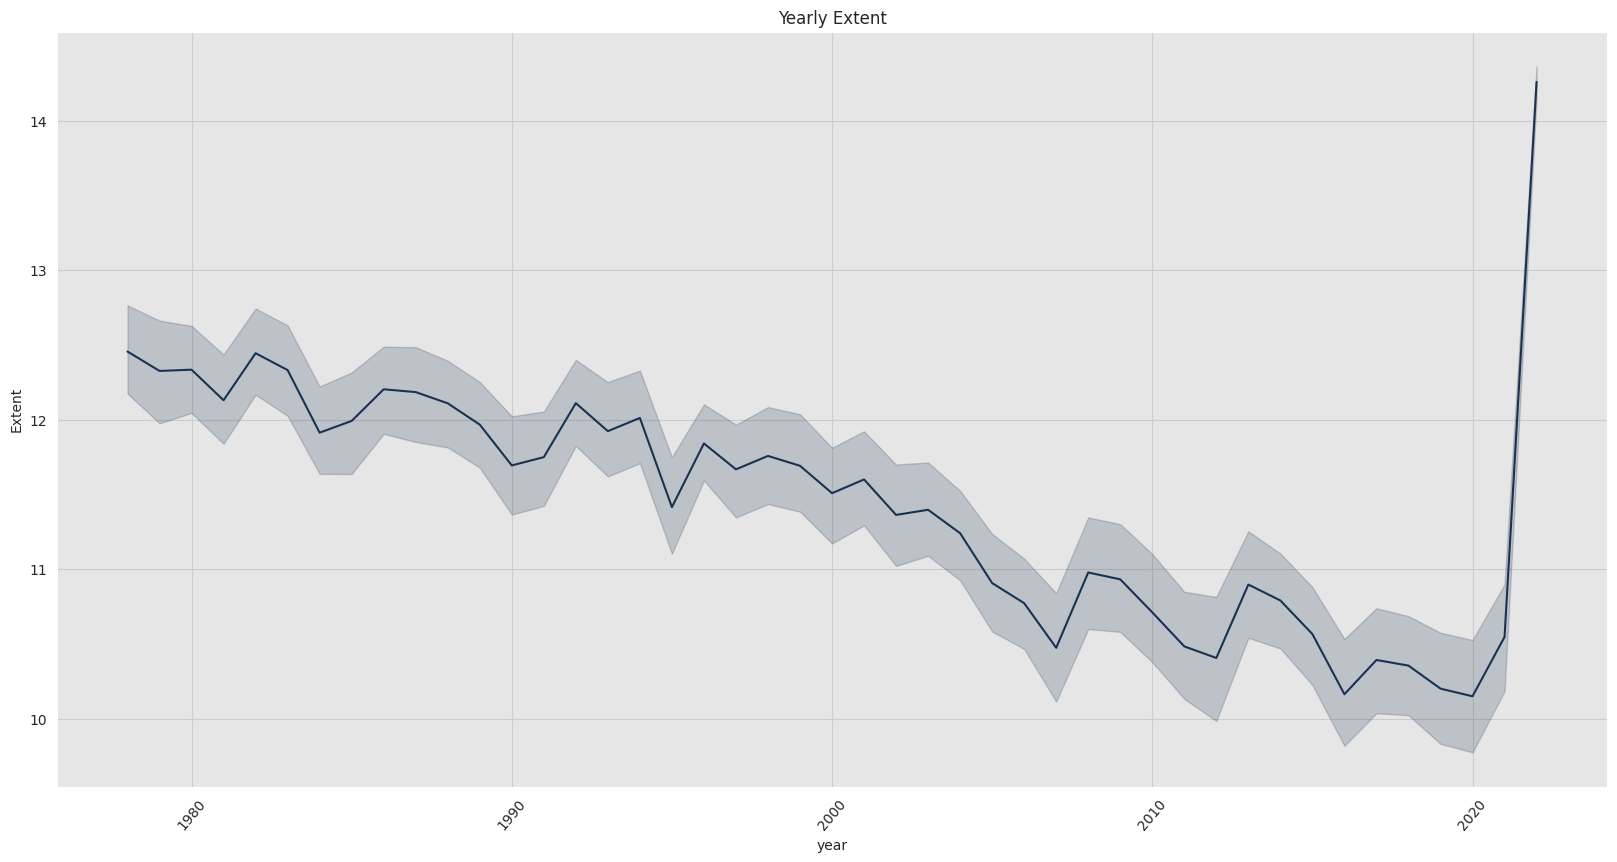

In [33]:
palette = sns.color_palette("bright")
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='year', y='Extent', data=df_n, ax=ax)
ax.set(title='Yearly Extent', ylabel='Extent')

plt.xticks(rotation=50);

### Polar plot

In [45]:
from calendar import monthrange
from calendar import month_name

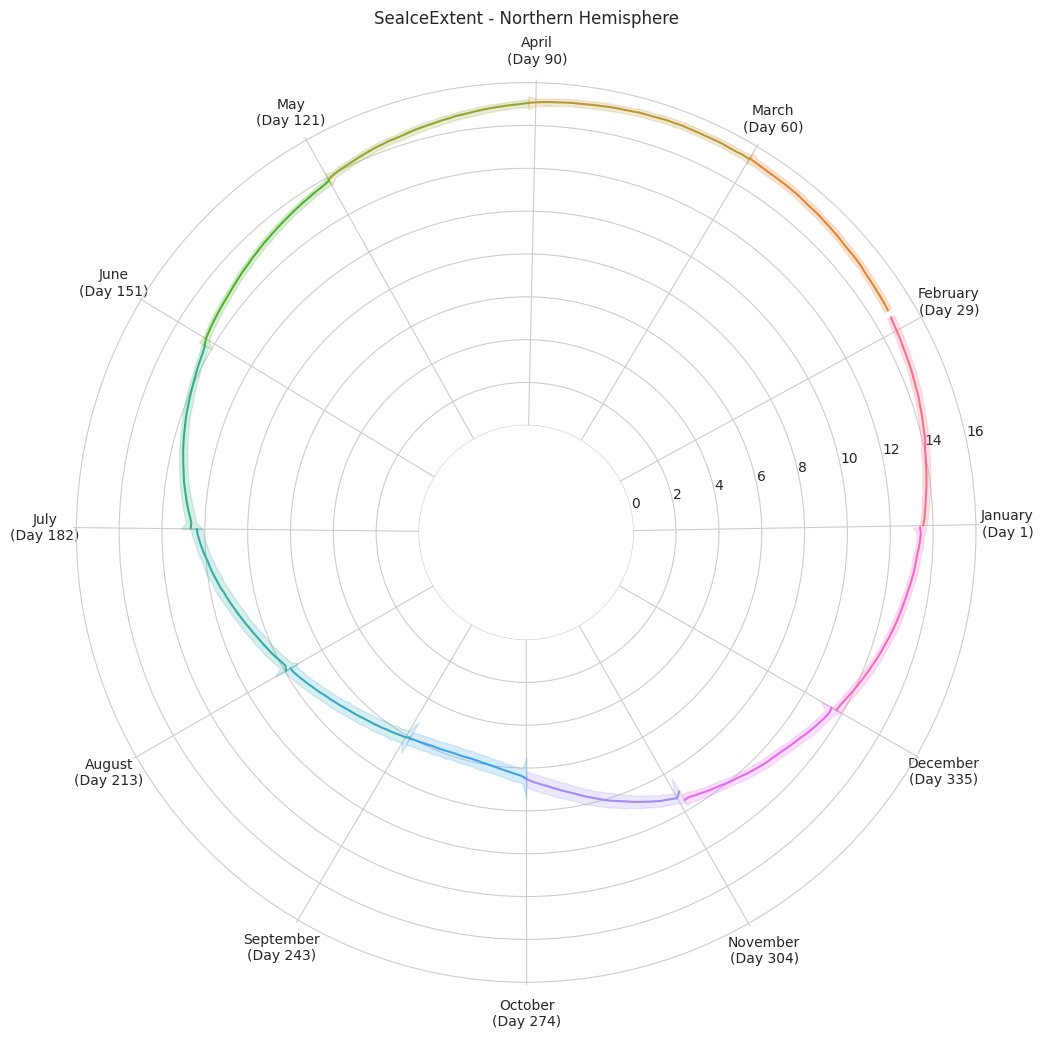

In [51]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
df_n \
    .assign(day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='Extent', 
        hue='month',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

days_per_month=[monthrange(2021, i)[1] for i in range(1,13)]                    #findout how many days each month has  
month_theta=(np.array(days_per_month).cumsum()-days_per_month[0]+1)*2*np.pi/365.25 #find the starting day for each month and turn it into an angle 
month_label=[month_name[i] for i in range(1,13)]
month_label=[label+'\n(Day ' +str(int(month_theta[ind]*365.25/np.pi/2)) +')' for ind,label in enumerate(month_label)]

ax.set_facecolor('white')
ax.spines.clear()
ax.set_xticks(month_theta)
ax.set_xticklabels(month_label)
#ax.set_ylim(0,1500000)
#ax.set_yticks(yt:=[0,300000,600000,900000,1200000])
#ax.set_yticklabels([str(t)+'sqkm' for t in yt], rotation = 45)
ax.set_rlabel_position(12) 
ax.xaxis.set_tick_params(which='major',pad=10)

ax.set_rorigin(-5)
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend().set_visible(False)

ax.set_title('SeaIceExtent - Northern Hemisphere', va='bottom');
ax.figure.set_figwidth(12)
ax.figure.set_figheight(12)

#ax.figure.savefig("Basel_Temp_polar.png")

### Monthly Sea Ice extent

Seasonality refers to periodic fluctuations. As you can see below, there is a clear yearly seasonality. 

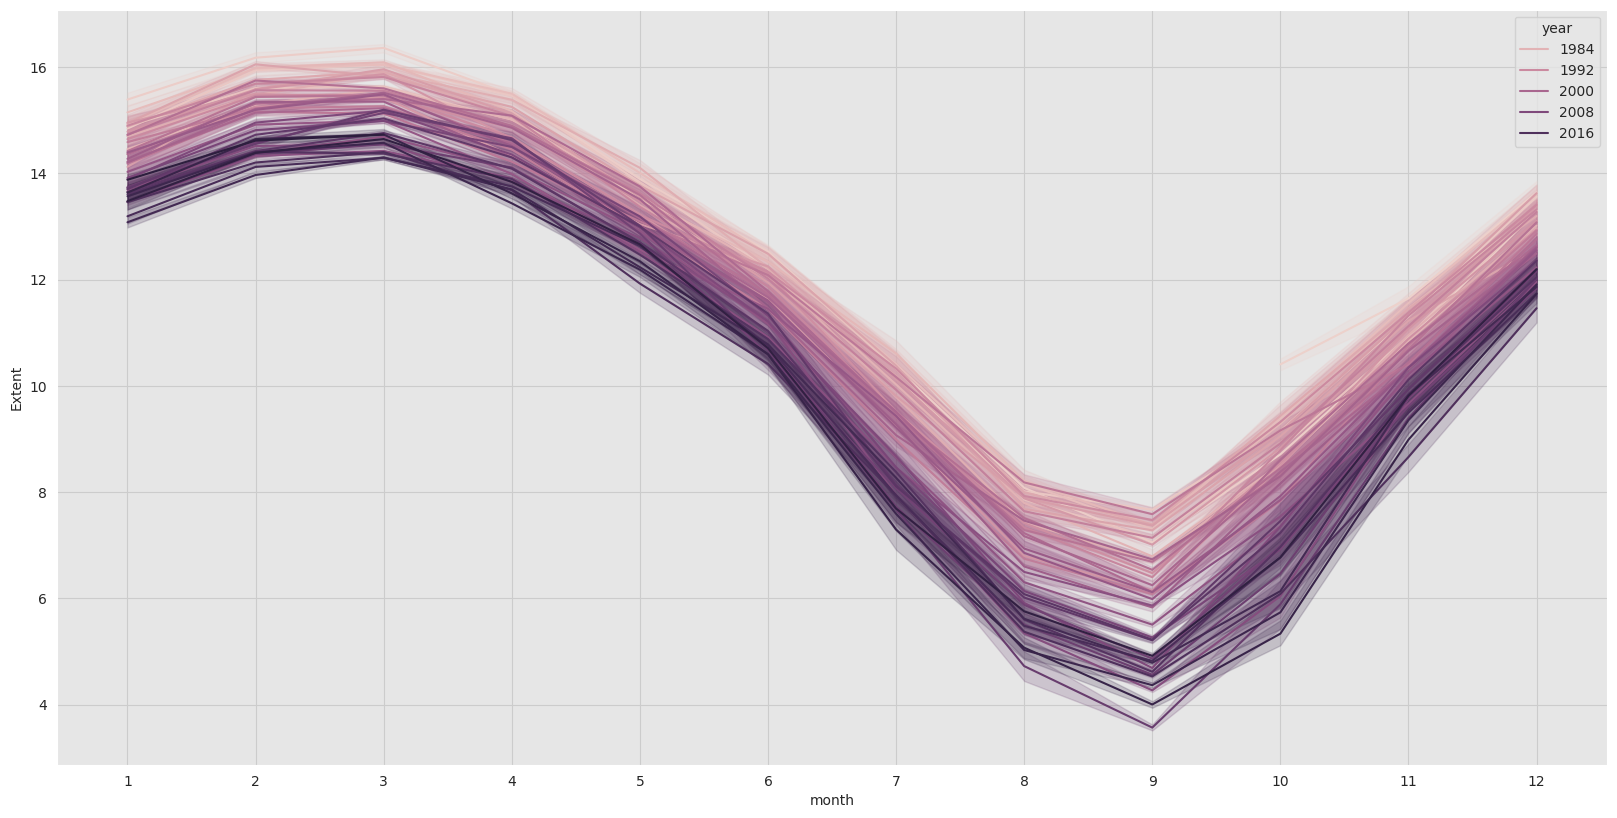

In [35]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x='month', y='Extent', data=df_n, hue='year')
sns.set_palette("pastel")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]);

### Creating groups for decades

#### changing type of year from object to intiger

**Splitting the data in 4 decades**

dacade 1 = data from 1978 till 1989

dacade 2 = data from 1990 till 1999

dacade 3 = data from 2000 till 2009

dacade 4 = data from 2010 till 2021

In [36]:
df_n_decade_1=df_n[(df_n['year']>1978) & (df_n['year']<1990)]
pd.DataFrame(df_n_decade_1)
df_n_decade_2=df_n[(df_n['year']>1989) & (df_n['year']<2000)]
pd.DataFrame(df_n_decade_2)
df_n_decade_3=df_n[(df_n['year']>1999) & (df_n['year']<2010)]
pd.DataFrame(df_n_decade_3)
df_n_decade_4=df_n[(df_n['year']>2009) & (df_n['year']<2022)]
pd.DataFrame(df_n_decade_4)

,date,Extent,timestamp,year,month,day
11390,2010-01-01,13.205,2010-01-01,2010,1,1
11391,2010-01-02,13.232,2010-01-02,2010,1,2
11392,2010-01-03,13.254,2010-01-03,2010,1,3
11393,2010-01-04,13.236,2010-01-04,2010,1,4
11394,2010-01-05,13.337,2010-01-05,2010,1,5
...,...,...,...,...,...,...
15768,2021-12-27,12.947,2021-12-27,2021,12,27
15769,2021-12-28,12.978,2021-12-28,2021,12,28
15770,2021-12-29,13.050,2021-12-29,2021,12,29
15771,2021-12-30,13.149,2021-12-30,2021,12,30


### Comparing the sea ice extent for 4 decades

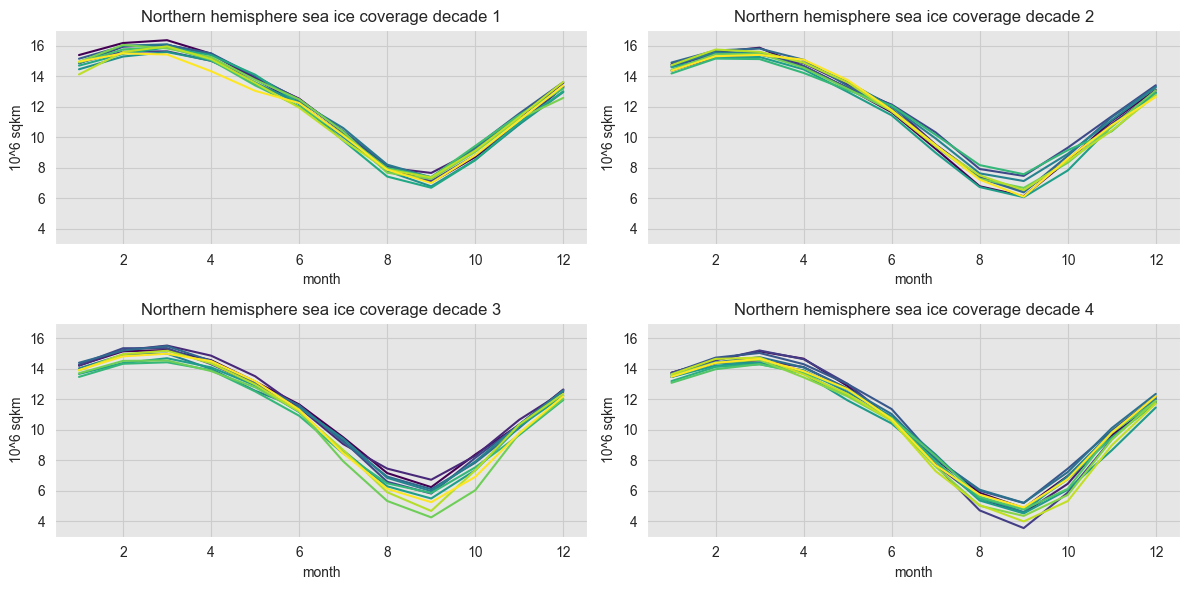

In [38]:
#define number of rows and columns for subplots
nrow=2
ncol=2
# make a list of all dataframes
df_list = [df_n_decade_1, df_n_decade_2, df_n_decade_3, df_n_decade_4]
fig, axes = plt.subplots(nrow, ncol)
ax.legend(title='year', loc='center left')
ax.set(title='Sea ice coverage/ Northern hemisphere', ylabel='sqkm')
ax.set_xlim([0,12])
ax.set_ylim([0,10])
fig.tight_layout()
# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        pd.pivot_table(data=df_list[count][['Extent']], index=df_list[count]['month'], columns=df_list[count]['year']) \
        .plot(cmap='viridis', ax=axes[r,c], title='Northern hemisphere sea ice coverage' + ' decade ' + str(count+1), xlabel = 'month', ylabel='10^6 sqkm', legend ='')\
        .set_ylim([3,17])
        fig.tight_layout()
        count+=1
fig.savefig('images/northern_hemisphere.png', dpi=300)



## Summary

This notebook provides the analysis of the sea ice extent in Northern hemisphere from 1978 till 2022. Sea ice undergoes large seasonal changes in extent as the ocean freezes and the ice cover expends in the autumn and winter, followed by a period of melting and retreat in spring and summer. The results show the clear seasonality of the sea ice, it reaches its maximum in February or march and it reaches its minimum in september. From the comparison, we can see that there is a clear decreasing trend of sea ice extent in every year. The formation of sea ice after melting in the summer is also reducing every year. The lowest sea ice found in the summer was in 2012 and the second lowest was in 2020 because of the Siberien heat wave. 
